# Chicago Water Lead Levels Anatomization


## Install libraries:

In [2]:
%pip install --upgrade pip
%pip install seaborn
%pip install openpyxl
%pip install python-Levenshtein
%pip install pandas
%pip install numpy
%pip install geopandas
%pip install uszipcode
%pip install altair
%pip install seaborn
%pip install openpyxl
%pip install levenshtein

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Libraries:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from uszipcode import SearchEngine
import altair as alt
import json

## Load Dataset:
Load lead data set
Load street data set containing street direction location by Chicago grid address  
Load GeoJson file with Chicago neighborhood boundaries

In [21]:
df = pd.read_excel('lead.xlsx',skiprows=2,dtype={'Address': str, '1st Draw': str, '2/3 Min': str, '5 Min': str})
gdf = chicagogdf = gpd.read_file("boundaries-zipcode.geojson")
df_streets = pd.read_csv('Streets.csv')
zip_df = pd.read_csv('uszips.csv')

Replace X to 0

In [23]:
for i,row in df.iterrows():
    addr = row['Address']
    addr_l = addr.split()
    addr_l[0] = addr_l[0].replace('X','0')
    fixed_addr = ' '.join(addr_l)
    df.loc[i, 'Address'] = fixed_addr
df

,Sample Date,Address,1st Draw,2/3 Min,5 Min
0,2019-10-16 00:00:00,100000 S OAKLEY AVE,3,10,9.6
1,2019-02-23 00:00:00,10000 S ARTESIAN AVE,9.2,4.3,2.5
2,2019-05-03 00:00:00,10000 S ARTESIAN AVE,1.1,2.9,1.3
3,2019-05-05 00:00:00,10000 S ARTESIAN AVE,1.2,2.6,< 1
4,2021-11-30 09:00:00,10000 S AVENUE L,3.6,16,4.6
...,...,...,...,...,...
40051,2020-02-19 00:00:00,00 W SCHILLER ST,4.1,3.6,1.2
40052,2020-11-01 00:00:00,00 W SCHILLER ST,< 1,< 1,< 1
40053,2022-10-26 07:04:00,00 W SCHILLER ST,<0.5,<0.5,<0.5
40054,2023-05-23 08:15:00,00 W SCHILLER ST,1,1.3,0.6


Remove invalid row

In [24]:
df = df[df['1st Draw'].notna()]
df = df[df['2/3 Min'].notna()]
df = df[df['5 Min'].notna()]
df = df[df['1st Draw'] != ' ']
df = df[df['5 Min'] != ' ']
df = df[df['2/3 Min'] != ' ']
df = df[df['1st Draw'] != '']
df = df[df['5 Min'] != '']
df = df[df['2/3 Min'] != '']
df

,Sample Date,Address,1st Draw,2/3 Min,5 Min
0,2019-10-16 00:00:00,100000 S OAKLEY AVE,3,10,9.6
1,2019-02-23 00:00:00,10000 S ARTESIAN AVE,9.2,4.3,2.5
2,2019-05-03 00:00:00,10000 S ARTESIAN AVE,1.1,2.9,1.3
3,2019-05-05 00:00:00,10000 S ARTESIAN AVE,1.2,2.6,< 1
4,2021-11-30 09:00:00,10000 S AVENUE L,3.6,16,4.6
...,...,...,...,...,...
40051,2020-02-19 00:00:00,00 W SCHILLER ST,4.1,3.6,1.2
40052,2020-11-01 00:00:00,00 W SCHILLER ST,< 1,< 1,< 1
40053,2022-10-26 07:04:00,00 W SCHILLER ST,<0.5,<0.5,<0.5
40054,2023-05-23 08:15:00,00 W SCHILLER ST,1,1.3,0.6


remove '<' symbol

In [26]:
cols = ['1st Draw', '2/3 Min', '5 Min']
df[cols] = df[cols].applymap(lambda x: x.replace('<', '').strip() if isinstance(x, str) else x)
df['1st Draw'] = df['1st Draw'].astype(float)
df['2/3 Min'] = df['2/3 Min'].astype(float)
df['5 Min'] = df['5 Min'].astype(float)
df = df.sort_values('Sample Date', ascending=True).reset_index(drop=True)

df.to_csv('lead_cleaned.csv')
df

,Sample Date,Address,1st Draw,2/3 Min,5 Min
0,2016-01-27 00:00:00,3800 S CAMPBELL AVE,1.54,1.00,1.00
1,2016-01-27 00:00:00,4500 N MERRIMAC AVE,3.22,2.17,1.94
2,2016-01-29 00:00:00,2500 N ST LOUIS AVE,19.10,1.89,1.66
3,2016-01-29 00:00:00,2500 N ST LOUIS AVE*,19.10,1.89,1.66
4,2016-01-29 00:00:00,6100 S LANGLEY AVE,1.00,1.00,1.00
...,...,...,...,...,...
37313,2023-08-25 16:00:00,4900 W KAMERLING AVE,3.60,7.60,3.30
37314,2023-08-27 08:21:00,1400 N NOBLE ST,0.50,0.50,0.50
37315,2023-08-27 09:33:00,800 N PAULINA ST,0.50,0.50,0.50
37316,2023-08-28 07:00:00,1700 N PARKSIDE AVE,0.50,0.50,0.50


In [67]:
df.columns

Index(['Sample Date', 'Address', '1st Draw', '2/3 Min', '5 Min'], dtype='object')

In [68]:
gdf.columns

Index(['objectid', 'shape_area', 'shape_len', 'zip', 'geometry'], dtype='object')

In [69]:
gdf.head()

,objectid,shape_area,shape_len,zip,geometry
0,33,106052287.488,42720.0444058,60647,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,34,127476050.762,48103.7827213,60639,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,35,45069038.4783,27288.6096123,60707,"MULTIPOLYGON (((-87.78500 41.90915, -87.78531 ..."
3,36,70853834.3797,42527.9896789,60622,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,37,99039621.2518,47970.1401531,60651,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."


extract address number into a new column. will be used to get coordinates

In [70]:
# Replace 'XX' with '00', then replace 'X' with '0', and extract street numbers
df['Address Num'] = df['Address'].str.replace('XX', '00').str.replace('X', '0').str.extract(r'(\d+)').fillna(0).astype(int)

df

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Address Num
0,2016-01-27 00:00:00,3800 S CAMPBELL AVE,1.54,1.00,1.00,3800
1,2016-01-27 00:00:00,4500 N MERRIMAC AVE,3.22,2.17,1.94,4500
2,2016-01-29 00:00:00,2500 N ST LOUIS AVE,19.10,1.89,1.66,2500
3,2016-01-29 00:00:00,2500 N ST LOUIS AVE*,19.10,1.89,1.66,2500
4,2016-01-29 00:00:00,6100 S LANGLEY AVE,1.00,1.00,1.00,6100
...,...,...,...,...,...,...
37313,2023-08-25 16:00:00,4900 W KAMERLING AVE,3.60,7.60,3.30,4900
37314,2023-08-27 08:21:00,1400 N NOBLE ST,0.50,0.50,0.50,1400
37315,2023-08-27 09:33:00,800 N PAULINA ST,0.50,0.50,0.50,800
37316,2023-08-28 07:00:00,1700 N PARKSIDE AVE,0.50,0.50,0.50,1700


In [71]:
# Extract the direction (N, S, E, W) from the 'Address' column
df['Address Dir'] = df['Address'].str.extract(r'\s([NSEW])\s')

# If the 'Address Dir' column contains any NaN values, fill them with an empty string
df['Address Dir'].fillna('', inplace=True)

df

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Address Num,Address Dir
0,2016-01-27 00:00:00,3800 S CAMPBELL AVE,1.54,1.00,1.00,3800,S
1,2016-01-27 00:00:00,4500 N MERRIMAC AVE,3.22,2.17,1.94,4500,N
2,2016-01-29 00:00:00,2500 N ST LOUIS AVE,19.10,1.89,1.66,2500,N
3,2016-01-29 00:00:00,2500 N ST LOUIS AVE*,19.10,1.89,1.66,2500,N
4,2016-01-29 00:00:00,6100 S LANGLEY AVE,1.00,1.00,1.00,6100,S
...,...,...,...,...,...,...,...
37313,2023-08-25 16:00:00,4900 W KAMERLING AVE,3.60,7.60,3.30,4900,W
37314,2023-08-27 08:21:00,1400 N NOBLE ST,0.50,0.50,0.50,1400,N
37315,2023-08-27 09:33:00,800 N PAULINA ST,0.50,0.50,0.50,800,N
37316,2023-08-28 07:00:00,1700 N PARKSIDE AVE,0.50,0.50,0.50,1700,N


extract street name for joining later on

In [72]:
# Extract the street name from the 'Address' column
df['Street Name'] = df['Address'].str.extract(r'[NSEW]\s(.+)$')
# Remove the asterisk (*) at the end of street names
df['Street Name'] = df['Street Name'].str.replace(r'\*$', '', regex=True)

df

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Address Num,Address Dir,Street Name
0,2016-01-27 00:00:00,3800 S CAMPBELL AVE,1.54,1.00,1.00,3800,S,CAMPBELL AVE
1,2016-01-27 00:00:00,4500 N MERRIMAC AVE,3.22,2.17,1.94,4500,N,MERRIMAC AVE
2,2016-01-29 00:00:00,2500 N ST LOUIS AVE,19.10,1.89,1.66,2500,N,ST LOUIS AVE
3,2016-01-29 00:00:00,2500 N ST LOUIS AVE*,19.10,1.89,1.66,2500,N,ST LOUIS AVE
4,2016-01-29 00:00:00,6100 S LANGLEY AVE,1.00,1.00,1.00,6100,S,LANGLEY AVE
...,...,...,...,...,...,...,...,...
37313,2023-08-25 16:00:00,4900 W KAMERLING AVE,3.60,7.60,3.30,4900,W,KAMERLING AVE
37314,2023-08-27 08:21:00,1400 N NOBLE ST,0.50,0.50,0.50,1400,N,NOBLE ST
37315,2023-08-27 09:33:00,800 N PAULINA ST,0.50,0.50,0.50,800,N,PAULINA ST
37316,2023-08-28 07:00:00,1700 N PARKSIDE AVE,0.50,0.50,0.50,1700,N,PARKSIDE AVE


add and fill coordinate columns (Lat, Lon)  
if the address direction is N or S, then add the Address Num to Lat  
if the address direction is E or W, then add the Address Num to Lon


In [73]:
# Add 'Lat' column
df['Lat'] = df.apply(lambda row: int(row['Address Num']) if 'N' in row['Address Dir'] or 'S' in row['Address Dir'] else None, axis=1)

# Add 'Lon' column
df['Lon'] = df.apply(lambda row: int(row['Address Num']) if 'E' in row['Address Dir'] or 'W' in row['Address Dir'] else None, axis=1)
df

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Address Num,Address Dir,Street Name,Lat,Lon
0,2016-01-27 00:00:00,3800 S CAMPBELL AVE,1.54,1.00,1.00,3800,S,CAMPBELL AVE,3800.0,NaN
1,2016-01-27 00:00:00,4500 N MERRIMAC AVE,3.22,2.17,1.94,4500,N,MERRIMAC AVE,4500.0,NaN
2,2016-01-29 00:00:00,2500 N ST LOUIS AVE,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,NaN
3,2016-01-29 00:00:00,2500 N ST LOUIS AVE*,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,NaN
4,2016-01-29 00:00:00,6100 S LANGLEY AVE,1.00,1.00,1.00,6100,S,LANGLEY AVE,6100.0,NaN
...,...,...,...,...,...,...,...,...,...,...
37313,2023-08-25 16:00:00,4900 W KAMERLING AVE,3.60,7.60,3.30,4900,W,KAMERLING AVE,NaN,4900.0
37314,2023-08-27 08:21:00,1400 N NOBLE ST,0.50,0.50,0.50,1400,N,NOBLE ST,1400.0,NaN
37315,2023-08-27 09:33:00,800 N PAULINA ST,0.50,0.50,0.50,800,N,PAULINA ST,800.0,NaN
37316,2023-08-28 07:00:00,1700 N PARKSIDE AVE,0.50,0.50,0.50,1700,N,PARKSIDE AVE,1700.0,NaN


In [74]:
df_streets.columns

Index(['Name', 'Street Dir', 'Street Num'], dtype='object')

In [75]:
df.columns

Index(['Sample Date', 'Address', '1st Draw', '2/3 Min', '5 Min', 'Address Num',
       'Address Dir', 'Street Name', 'Lat', 'Lon'],
      dtype='object')

make sure all street names are upper case before joining

In [76]:
df['Street Name'] = df['Street Name'].str.upper()
df_streets['Name'] = df_streets['Name'].str.upper()



In [77]:
merged_df = pd.merge(df, df_streets, left_on='Street Name', right_on='Name', how='left')


In [78]:
merged_df


,Sample Date,Address,1st Draw,2/3 Min,5 Min,Address Num,Address Dir,Street Name,Lat,Lon,Name,Street Dir,Street Num
0,2016-01-27 00:00:00,3800 S CAMPBELL AVE,1.54,1.00,1.00,3800,S,CAMPBELL AVE,3800.0,NaN,CAMPBELL AVE,W,2500.0
1,2016-01-27 00:00:00,4500 N MERRIMAC AVE,3.22,2.17,1.94,4500,N,MERRIMAC AVE,4500.0,NaN,MERRIMAC AVE,W,6234.0
2,2016-01-29 00:00:00,2500 N ST LOUIS AVE,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,NaN,ST LOUIS AVE,W,3500.0
3,2016-01-29 00:00:00,2500 N ST LOUIS AVE*,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,NaN,ST LOUIS AVE,W,3500.0
4,2016-01-29 00:00:00,6100 S LANGLEY AVE,1.00,1.00,1.00,6100,S,LANGLEY AVE,6100.0,NaN,LANGLEY AVE,E,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37576,2023-08-25 16:00:00,4900 W KAMERLING AVE,3.60,7.60,3.30,4900,W,KAMERLING AVE,NaN,4900.0,KAMERLING AVE,N,1332.0
37577,2023-08-27 08:21:00,1400 N NOBLE ST,0.50,0.50,0.50,1400,N,NOBLE ST,1400.0,NaN,NOBLE ST,W,1400.0
37578,2023-08-27 09:33:00,800 N PAULINA ST,0.50,0.50,0.50,800,N,PAULINA ST,800.0,NaN,PAULINA ST,W,1700.0
37579,2023-08-28 07:00:00,1700 N PARKSIDE AVE,0.50,0.50,0.50,1700,N,PARKSIDE AVE,1700.0,NaN,PARKSIDE AVE,W,5632.0


inspect any rows in the data frame

In [79]:
merged_df.iloc[20000:20010]


,Sample Date,Address,1st Draw,2/3 Min,5 Min,Address Num,Address Dir,Street Name,Lat,Lon,Name,Street Dir,Street Num
20000,2019-11-19,100 E DELAWARE PL,1.0,1.0,1.0,100,E,DELAWARE PL,NaN,100.0,DELAWARE PL,N,900.0
20001,2019-11-19,1900 N NEVA AVE,1.0,1.0,1.0,1900,N,NEVA AVE,1900.0,NaN,NEVA AVE,W,7132.0
20002,2019-11-19,2000 N LARRABEE ST,1.9,1.9,1.0,2000,N,LARRABEE ST,2000.0,NaN,LARRABEE ST,W,600.0
20003,2019-11-19,8400 S LUELLA AVE,1.7,1.1,1.0,8400,S,LUELLA AVE,8400.0,NaN,LUELLA AVE,E,2232.0
20004,2019-11-19,3400 W 76TH PL,4.1,1.5,1.2,3400,W,76TH PL,NaN,3400.0,76TH PL,S,7632.0
20005,2019-11-19,5900 N NEVA AVE,2.0,1.1,1.1,5900,N,NEVA AVE,5900.0,NaN,NEVA AVE,W,7132.0
20006,2019-11-19,3800 W VAN BUREN ST,1.8,4.2,2.7,3800,W,VAN BUREN ST,NaN,3800.0,VAN BUREN ST,S,400.0
20007,2019-11-19,3700 W 114TH PL,14.0,2.7,2.9,3700,W,114TH PL,NaN,3700.0,114TH PL,S,11432.0
20008,2019-11-19,5800 W CORNELIA AVE,1.6,2.0,2.6,5800,W,CORNELIA AVE,NaN,5800.0,CORNELIA AVE,N,3500.0
20009,2019-11-19,900 N KEYSTONE AVE,1.0,1.0,1.0,900,N,KEYSTONE AVE,900.0,NaN,KEYSTONE AVE,W,4032.0


put the street number in the corresponding coordinate (Lat or Lon) 

In [80]:
merged_df['Lat'] = np.where(merged_df['Street Dir'].isin(['N', 'S']), merged_df['Street Num'], merged_df['Lat'])
merged_df['Lon'] = np.where(merged_df['Street Dir'].isin(['E', 'W']), merged_df['Street Num'], merged_df['Lon'])


inspect

In [81]:
merged_df

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Address Num,Address Dir,Street Name,Lat,Lon,Name,Street Dir,Street Num
0,2016-01-27 00:00:00,3800 S CAMPBELL AVE,1.54,1.00,1.00,3800,S,CAMPBELL AVE,3800.0,2500.0,CAMPBELL AVE,W,2500.0
1,2016-01-27 00:00:00,4500 N MERRIMAC AVE,3.22,2.17,1.94,4500,N,MERRIMAC AVE,4500.0,6234.0,MERRIMAC AVE,W,6234.0
2,2016-01-29 00:00:00,2500 N ST LOUIS AVE,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,3500.0,ST LOUIS AVE,W,3500.0
3,2016-01-29 00:00:00,2500 N ST LOUIS AVE*,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,3500.0,ST LOUIS AVE,W,3500.0
4,2016-01-29 00:00:00,6100 S LANGLEY AVE,1.00,1.00,1.00,6100,S,LANGLEY AVE,6100.0,700.0,LANGLEY AVE,E,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37576,2023-08-25 16:00:00,4900 W KAMERLING AVE,3.60,7.60,3.30,4900,W,KAMERLING AVE,1332.0,4900.0,KAMERLING AVE,N,1332.0
37577,2023-08-27 08:21:00,1400 N NOBLE ST,0.50,0.50,0.50,1400,N,NOBLE ST,1400.0,1400.0,NOBLE ST,W,1400.0
37578,2023-08-27 09:33:00,800 N PAULINA ST,0.50,0.50,0.50,800,N,PAULINA ST,800.0,1700.0,PAULINA ST,W,1700.0
37579,2023-08-28 07:00:00,1700 N PARKSIDE AVE,0.50,0.50,0.50,1700,N,PARKSIDE AVE,1700.0,5632.0,PARKSIDE AVE,W,5632.0


In [82]:
merged_df.iloc[20000:20010]

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Address Num,Address Dir,Street Name,Lat,Lon,Name,Street Dir,Street Num
20000,2019-11-19,100 E DELAWARE PL,1.0,1.0,1.0,100,E,DELAWARE PL,900.0,100.0,DELAWARE PL,N,900.0
20001,2019-11-19,1900 N NEVA AVE,1.0,1.0,1.0,1900,N,NEVA AVE,1900.0,7132.0,NEVA AVE,W,7132.0
20002,2019-11-19,2000 N LARRABEE ST,1.9,1.9,1.0,2000,N,LARRABEE ST,2000.0,600.0,LARRABEE ST,W,600.0
20003,2019-11-19,8400 S LUELLA AVE,1.7,1.1,1.0,8400,S,LUELLA AVE,8400.0,2232.0,LUELLA AVE,E,2232.0
20004,2019-11-19,3400 W 76TH PL,4.1,1.5,1.2,3400,W,76TH PL,7632.0,3400.0,76TH PL,S,7632.0
20005,2019-11-19,5900 N NEVA AVE,2.0,1.1,1.1,5900,N,NEVA AVE,5900.0,7132.0,NEVA AVE,W,7132.0
20006,2019-11-19,3800 W VAN BUREN ST,1.8,4.2,2.7,3800,W,VAN BUREN ST,400.0,3800.0,VAN BUREN ST,S,400.0
20007,2019-11-19,3700 W 114TH PL,14.0,2.7,2.9,3700,W,114TH PL,11432.0,3700.0,114TH PL,S,11432.0
20008,2019-11-19,5800 W CORNELIA AVE,1.6,2.0,2.6,5800,W,CORNELIA AVE,3500.0,5800.0,CORNELIA AVE,N,3500.0
20009,2019-11-19,900 N KEYSTONE AVE,1.0,1.0,1.0,900,N,KEYSTONE AVE,900.0,4032.0,KEYSTONE AVE,W,4032.0


we now have the city grid locations. we need to convert to gps coordinates  

In [83]:
base_lat = 41.8820500120278
base_lon = -87.62782737167875
# lat_factor = 0.0000174041
# lon_factor = 0.0000248416
lat_factor_N = 0.00001818932
lat_factor_S = 0.00001687716
lon_factor_E = 0.00002430679
lon_factor_W = 0.00002456658

# Create 'Lat GPS' column with computed values
merged_df['Lat GPS'] = np.where(
    (merged_df['Street Dir'].isin(['N']) | merged_df['Address Dir'].isin(['N'])),
    base_lat + merged_df['Lat'] * lat_factor_N, merged_df['Lat']
)
merged_df['Lat GPS'] = np.where(
    (merged_df['Street Dir'].isin(['S']) | merged_df['Address Dir'].isin(['S'])),
    base_lat - merged_df['Lat'] * lat_factor_S, merged_df['Lat GPS']
)

# Create 'Lon GPS' column with computed values
merged_df['Lon GPS'] = np.where(
    (merged_df['Street Dir'].isin(['E']) | merged_df['Address Dir'].isin(['E'])),
    base_lon + merged_df['Lon'] * lon_factor_E, merged_df['Lon']
)
merged_df['Lon GPS'] = np.where(
    (merged_df['Street Dir'].isin(['W']) | merged_df['Address Dir'].isin(['W'])),
    base_lon - merged_df['Lon'] * lon_factor_W, merged_df['Lon GPS']
)



In [84]:
merged_df

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Address Num,Address Dir,Street Name,Lat,Lon,Name,Street Dir,Street Num,Lat GPS,Lon GPS
0,2016-01-27 00:00:00,3800 S CAMPBELL AVE,1.54,1.00,1.00,3800,S,CAMPBELL AVE,3800.0,2500.0,CAMPBELL AVE,W,2500.0,41.817917,-87.689244
1,2016-01-27 00:00:00,4500 N MERRIMAC AVE,3.22,2.17,1.94,4500,N,MERRIMAC AVE,4500.0,6234.0,MERRIMAC AVE,W,6234.0,41.963902,-87.780975
2,2016-01-29 00:00:00,2500 N ST LOUIS AVE,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,3500.0,ST LOUIS AVE,W,3500.0,41.927523,-87.713810
3,2016-01-29 00:00:00,2500 N ST LOUIS AVE*,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,3500.0,ST LOUIS AVE,W,3500.0,41.927523,-87.713810
4,2016-01-29 00:00:00,6100 S LANGLEY AVE,1.00,1.00,1.00,6100,S,LANGLEY AVE,6100.0,700.0,LANGLEY AVE,E,700.0,41.779099,-87.610813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37576,2023-08-25 16:00:00,4900 W KAMERLING AVE,3.60,7.60,3.30,4900,W,KAMERLING AVE,1332.0,4900.0,KAMERLING AVE,N,1332.0,41.906278,-87.748204
37577,2023-08-27 08:21:00,1400 N NOBLE ST,0.50,0.50,0.50,1400,N,NOBLE ST,1400.0,1400.0,NOBLE ST,W,1400.0,41.907515,-87.662221
37578,2023-08-27 09:33:00,800 N PAULINA ST,0.50,0.50,0.50,800,N,PAULINA ST,800.0,1700.0,PAULINA ST,W,1700.0,41.896601,-87.669591
37579,2023-08-28 07:00:00,1700 N PARKSIDE AVE,0.50,0.50,0.50,1700,N,PARKSIDE AVE,1700.0,5632.0,PARKSIDE AVE,W,5632.0,41.912972,-87.766186


In [85]:
merged_df.iloc[20000:20010]

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Address Num,Address Dir,Street Name,Lat,Lon,Name,Street Dir,Street Num,Lat GPS,Lon GPS
20000,2019-11-19,100 E DELAWARE PL,1.0,1.0,1.0,100,E,DELAWARE PL,900.0,100.0,DELAWARE PL,N,900.0,41.898420,-87.625397
20001,2019-11-19,1900 N NEVA AVE,1.0,1.0,1.0,1900,N,NEVA AVE,1900.0,7132.0,NEVA AVE,W,7132.0,41.916610,-87.803036
20002,2019-11-19,2000 N LARRABEE ST,1.9,1.9,1.0,2000,N,LARRABEE ST,2000.0,600.0,LARRABEE ST,W,600.0,41.918429,-87.642567
20003,2019-11-19,8400 S LUELLA AVE,1.7,1.1,1.0,8400,S,LUELLA AVE,8400.0,2232.0,LUELLA AVE,E,2232.0,41.740282,-87.573575
20004,2019-11-19,3400 W 76TH PL,4.1,1.5,1.2,3400,W,76TH PL,7632.0,3400.0,76TH PL,S,7632.0,41.753244,-87.711354
20005,2019-11-19,5900 N NEVA AVE,2.0,1.1,1.1,5900,N,NEVA AVE,5900.0,7132.0,NEVA AVE,W,7132.0,41.989367,-87.803036
20006,2019-11-19,3800 W VAN BUREN ST,1.8,4.2,2.7,3800,W,VAN BUREN ST,400.0,3800.0,VAN BUREN ST,S,400.0,41.875299,-87.721180
20007,2019-11-19,3700 W 114TH PL,14.0,2.7,2.9,3700,W,114TH PL,11432.0,3700.0,114TH PL,S,11432.0,41.689110,-87.718724
20008,2019-11-19,5800 W CORNELIA AVE,1.6,2.0,2.6,5800,W,CORNELIA AVE,3500.0,5800.0,CORNELIA AVE,N,3500.0,41.945713,-87.770314
20009,2019-11-19,900 N KEYSTONE AVE,1.0,1.0,1.0,900,N,KEYSTONE AVE,900.0,4032.0,KEYSTONE AVE,W,4032.0,41.898420,-87.726880


In [86]:
gdf.columns

Index(['objectid', 'shape_area', 'shape_len', 'zip', 'geometry'], dtype='object')

the dataset is now ready to be plotted on the geojson shape file

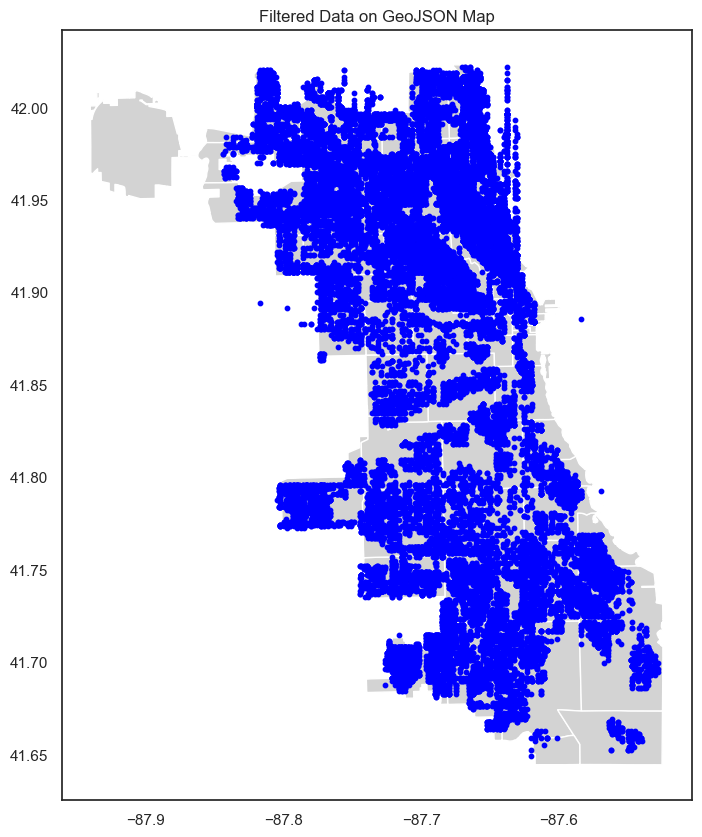

In [87]:
# Define your bounding box (min_lon, min_lat, max_lon, max_lat)
bounding_box = (-87.90, 41.50, -87.50, 42.08)  # Example bounding box

# Filter the DataFrame to include only points within the bounding box
filtered_df = merged_df[
    (merged_df['Lon GPS'] >= bounding_box[0]) &
    (merged_df['Lon GPS'] <= bounding_box[2]) &
    (merged_df['Lat GPS'] >= bounding_box[1]) &
    (merged_df['Lat GPS'] <= bounding_box[3])
]

# Create a GeoDataFrame from the filtered DataFrame
gdf = gpd.GeoDataFrame(
    filtered_df,
    geometry=gpd.points_from_xy(filtered_df['Lon GPS'], filtered_df['Lat GPS']),
    crs="EPSG:4326"
)

# Read the GeoJSON file into a GeoDataFrame
geojson_file = "boundaries-zipcode.geojson"
geojson_gdf = gpd.read_file(geojson_file)

# Plot the GeoJSON data and the filtered points
ax = geojson_gdf.plot(color='lightgray', figsize=(10, 10))
gdf.plot(ax=ax, color='blue', markersize=10)

# You can customize the plot further if needed
plt.title("Filtered Data on GeoJSON Map")
plt.show()

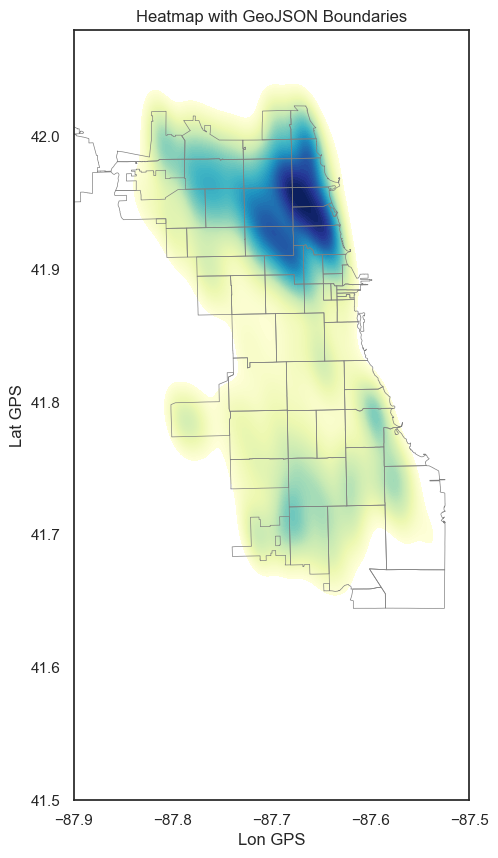

In [88]:

# Define your bounding box (min_lon, min_lat, max_lon, max_lat)
bounding_box = (-87.90, 41.50, -87.50, 42.08)  # Example bounding box

# Filter the DataFrame to include only points within the bounding box
filtered_df = merged_df[
    (merged_df['Lon GPS'] >= bounding_box[0]) &
    (merged_df['Lon GPS'] <= bounding_box[2]) &
    (merged_df['Lat GPS'] >= bounding_box[1]) &
    (merged_df['Lat GPS'] <= bounding_box[3])
]

# Create a GeoDataFrame from the filtered DataFrame
gdf = gpd.GeoDataFrame(
    filtered_df,
    geometry=gpd.points_from_xy(filtered_df['Lon GPS'], filtered_df['Lat GPS']),
    crs="EPSG:4326"
)

# Create a heatmap
sns.set(style="white")
plt.figure(figsize=(10, 10))
sns.kdeplot(data=gdf, x="Lon GPS", y="Lat GPS", fill=True, cmap="YlGnBu", levels=100)

# Read the GeoJSON file into a GeoDataFrame
geojson_file = "boundaries-zipcode.geojson"
geojson_gdf = gpd.read_file(geojson_file)

# Plot the GeoJSON data on top of the heatmap
ax = geojson_gdf.plot(ax=plt.gca(), color='none', edgecolor='gray', linewidth=0.5)
ax.set_xlim(bounding_box[0], bounding_box[2])
ax.set_ylim(bounding_box[1], bounding_box[3])

plt.title("Heatmap with GeoJSON Boundaries")
plt.show()

In [89]:
gdf.columns

Index(['Sample Date', 'Address', '1st Draw', '2/3 Min', '5 Min', 'Address Num',
       'Address Dir', 'Street Name', 'Lat', 'Lon', 'Name', 'Street Dir',
       'Street Num', 'Lat GPS', 'Lon GPS', 'geometry'],
      dtype='object')

In [90]:
search = SearchEngine(db_file_path="./tmp/zipcodes.sqlite") 

In [94]:
def get_zip_code(latitude, longitude):
    '''This function turns Latitude and Longitude into zipcodes'''
    #print(latitude,longitude)
    try:
        z = search.by_coordinates(lat = latitude,lng =  longitude, radius = 5, returns = 1)
        return z[0].to_dict()['zipcode']
    except:
        z = "error"
        return z
     #access the zipcode from information object


#Add zipcode column to cameras_sorted 
#this will take like 5 mins to run make sure you have python levenshtein installed https://pypi.org/project/python-Levenshtein/
merged_df['zip'] = merged_df.apply(lambda datapoint: get_zip_code(datapoint['Lat GPS'],datapoint['Lon GPS']), axis = 1)
merged_df

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Address Num,Address Dir,Street Name,Lat,Lon,Name,Street Dir,Street Num,Lat GPS,Lon GPS,zip
0,2016-01-27 00:00:00,3800 S CAMPBELL AVE,1.54,1.00,1.00,3800,S,CAMPBELL AVE,3800.0,2500.0,CAMPBELL AVE,W,2500.0,41.817917,-87.689244,60609
1,2016-01-27 00:00:00,4500 N MERRIMAC AVE,3.22,2.17,1.94,4500,N,MERRIMAC AVE,4500.0,6234.0,MERRIMAC AVE,W,6234.0,41.963902,-87.780975,60706
2,2016-01-29 00:00:00,2500 N ST LOUIS AVE,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,3500.0,ST LOUIS AVE,W,3500.0,41.927523,-87.713810,60647
3,2016-01-29 00:00:00,2500 N ST LOUIS AVE*,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,3500.0,ST LOUIS AVE,W,3500.0,41.927523,-87.713810,60647
4,2016-01-29 00:00:00,6100 S LANGLEY AVE,1.00,1.00,1.00,6100,S,LANGLEY AVE,6100.0,700.0,LANGLEY AVE,E,700.0,41.779099,-87.610813,60637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37576,2023-08-25 16:00:00,4900 W KAMERLING AVE,3.60,7.60,3.30,4900,W,KAMERLING AVE,1332.0,4900.0,KAMERLING AVE,N,1332.0,41.906278,-87.748204,60651
37577,2023-08-27 08:21:00,1400 N NOBLE ST,0.50,0.50,0.50,1400,N,NOBLE ST,1400.0,1400.0,NOBLE ST,W,1400.0,41.907515,-87.662221,60642
37578,2023-08-27 09:33:00,800 N PAULINA ST,0.50,0.50,0.50,800,N,PAULINA ST,800.0,1700.0,PAULINA ST,W,1700.0,41.896601,-87.669591,60622
37579,2023-08-28 07:00:00,1700 N PARKSIDE AVE,0.50,0.50,0.50,1700,N,PARKSIDE AVE,1700.0,5632.0,PARKSIDE AVE,W,5632.0,41.912972,-87.766186,60639


In [100]:
merged_df.to_csv('merged_df.csv')
merged_df

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Address Num,Address Dir,Street Name,Lat,Lon,Name,Street Dir,Street Num,Lat GPS,Lon GPS,zip
0,2016-01-27 00:00:00,3800 S CAMPBELL AVE,1.54,1.00,1.00,3800,S,CAMPBELL AVE,3800.0,2500.0,CAMPBELL AVE,W,2500.0,41.817917,-87.689244,60609
1,2016-01-27 00:00:00,4500 N MERRIMAC AVE,3.22,2.17,1.94,4500,N,MERRIMAC AVE,4500.0,6234.0,MERRIMAC AVE,W,6234.0,41.963902,-87.780975,60706
2,2016-01-29 00:00:00,2500 N ST LOUIS AVE,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,3500.0,ST LOUIS AVE,W,3500.0,41.927523,-87.713810,60647
3,2016-01-29 00:00:00,2500 N ST LOUIS AVE*,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,3500.0,ST LOUIS AVE,W,3500.0,41.927523,-87.713810,60647
4,2016-01-29 00:00:00,6100 S LANGLEY AVE,1.00,1.00,1.00,6100,S,LANGLEY AVE,6100.0,700.0,LANGLEY AVE,E,700.0,41.779099,-87.610813,60637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37576,2023-08-25 16:00:00,4900 W KAMERLING AVE,3.60,7.60,3.30,4900,W,KAMERLING AVE,1332.0,4900.0,KAMERLING AVE,N,1332.0,41.906278,-87.748204,60651
37577,2023-08-27 08:21:00,1400 N NOBLE ST,0.50,0.50,0.50,1400,N,NOBLE ST,1400.0,1400.0,NOBLE ST,W,1400.0,41.907515,-87.662221,60642
37578,2023-08-27 09:33:00,800 N PAULINA ST,0.50,0.50,0.50,800,N,PAULINA ST,800.0,1700.0,PAULINA ST,W,1700.0,41.896601,-87.669591,60622
37579,2023-08-28 07:00:00,1700 N PARKSIDE AVE,0.50,0.50,0.50,1700,N,PARKSIDE AVE,1700.0,5632.0,PARKSIDE AVE,W,5632.0,41.912972,-87.766186,60639


In [93]:
#Aggregate data by averaging by neighborhood
draws_by_zip = merged_df.groupby('zip')['1st Draw', '2/3 Min', '5 Min'].mean().reset_index()
draws_by_zip

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
gdf_merged_avg_draws = pd.merge(draws_by_zip, gdf, how='inner', on='zip')
gdf_merged_avg_draws = gpd.GeoDataFrame(gdf_merged_avg_draws, crs="EPSG:4326", geometry='geometry')


In [ ]:
#makes choropleth maps
def gen_map(geodata, color_column, title, tooltip, color_scheme='bluegreen'):
    '''
    Generates chicago neighbourhoods map with choropleth
    '''
    
    # Add Base Layer
    base = alt.Chart(geodata, title = title).mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).encode(
    ).properties(
        width=800,
        height=800
    )
    # Add Choropleth Layer
    choro = alt.Chart(geodata).mark_geoshape(
        stroke='black'
    ).encode(
        alt.Color(color_column, 
                  type='quantitative', 
                  scale=alt.Scale(scheme=color_scheme),
                  title = ""),
         tooltip=tooltip
    
    return base + choro

In [ ]:
choro_avg_draws_json = json.loads(gdf_merged_avg_draws.to_json()) #to json
choro_avg_draws_data = alt.Data(values=choro_avg_draws_json['features']) #altair data
avg_1st_choro_map = gen_map(geodata=choro_avg_draws_data, color_column='properties.1st Draw', title='average 1st draw by zip', tooltip=['properties.zip:N','properties.1st Draw:Q'])
avg_1st_choro_map

In [ ]:
avg_2min_choro_map = gen_map(geodata=choro_avg_draws_data, color_column='properties.2/3 Min', title='average lead after 2-3 min by zip', tooltip=['properties.zip:N','properties.1st Draw:Q'])
avg_2min_choro_map

In [ ]:
avg_5min_choro_map = gen_map(geodata=choro_avg_draws_data, color_column='properties.5 Min', title='average lead after 5 mins running', tooltip=['properties.zip:N','properties.1st Draw:Q'])
avg_5min_choro_map

In [ ]:
all_draws_avg_map_linked = avg_1st_choro_map | avg_2min_choro_map | avg_5min_choro_map
all_draws_avg_map_linked

# Zip Code EDA Columns info in progress report

In [89]:
def is_int(val):
    try:
        int(val)
        return True
    except ValueError:
        return False

merged_df = pd.read_csv('merged_df.csv',index_col=0)
mask = merged_df['zip'].apply(is_int)
merged_df = merged_df.loc[mask]
merged_df['zip'] = merged_df['zip'].astype(int)
merged_df['Sample Date'] = pd.to_datetime(merged_df['Sample Date'])
merged_df

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Address Num,Address Dir,Street Name,Lat,Lon,Name,Street Dir,Street Num,Lat GPS,Lon GPS,zip
0,2016-01-27 00:00:00,3800 S CAMPBELL AVE,1.54,1.00,1.00,3800,S,CAMPBELL AVE,3800.0,2500.0,CAMPBELL AVE,W,2500.0,41.817917,-87.689244,60609
1,2016-01-27 00:00:00,4500 N MERRIMAC AVE,3.22,2.17,1.94,4500,N,MERRIMAC AVE,4500.0,6234.0,MERRIMAC AVE,W,6234.0,41.963902,-87.780975,60706
2,2016-01-29 00:00:00,2500 N ST LOUIS AVE,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,3500.0,ST LOUIS AVE,W,3500.0,41.927523,-87.713810,60647
3,2016-01-29 00:00:00,2500 N ST LOUIS AVE*,19.10,1.89,1.66,2500,N,ST LOUIS AVE,2500.0,3500.0,ST LOUIS AVE,W,3500.0,41.927523,-87.713810,60647
4,2016-01-29 00:00:00,6100 S LANGLEY AVE,1.00,1.00,1.00,6100,S,LANGLEY AVE,6100.0,700.0,LANGLEY AVE,E,700.0,41.779099,-87.610813,60637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37576,2023-08-25 16:00:00,4900 W KAMERLING AVE,3.60,7.60,3.30,4900,W,KAMERLING AVE,1332.0,4900.0,KAMERLING AVE,N,1332.0,41.906278,-87.748204,60651
37577,2023-08-27 08:21:00,1400 N NOBLE ST,0.50,0.50,0.50,1400,N,NOBLE ST,1400.0,1400.0,NOBLE ST,W,1400.0,41.907515,-87.662221,60642
37578,2023-08-27 09:33:00,800 N PAULINA ST,0.50,0.50,0.50,800,N,PAULINA ST,800.0,1700.0,PAULINA ST,W,1700.0,41.896601,-87.669591,60622
37579,2023-08-28 07:00:00,1700 N PARKSIDE AVE,0.50,0.50,0.50,1700,N,PARKSIDE AVE,1700.0,5632.0,PARKSIDE AVE,W,5632.0,41.912972,-87.766186,60639


In [90]:
df = pd.read_csv('lead_cleaned.csv',index_col=0)
df

,Sample Date,Address,1st Draw,2/3 Min,5 Min
0,2016-01-27 00:00:00,3800 S CAMPBELL AVE,1.54,1.00,1.00
1,2016-01-27 00:00:00,4500 N MERRIMAC AVE,3.22,2.17,1.94
2,2016-01-29 00:00:00,2500 N ST LOUIS AVE,19.10,1.89,1.66
3,2016-01-29 00:00:00,2500 N ST LOUIS AVE*,19.10,1.89,1.66
4,2016-01-29 00:00:00,6100 S LANGLEY AVE,1.00,1.00,1.00
...,...,...,...,...,...
37313,2023-08-25 16:00:00,4900 W KAMERLING AVE,3.60,7.60,3.30
37314,2023-08-27 08:21:00,1400 N NOBLE ST,0.50,0.50,0.50
37315,2023-08-27 09:33:00,800 N PAULINA ST,0.50,0.50,0.50
37316,2023-08-28 07:00:00,1700 N PARKSIDE AVE,0.50,0.50,0.50


In [91]:
# Load the CSV file into a Pandas DataFrame
zip_code_df = pd.read_excel('zip_code_stats.xlsx')
zip_code_df


,Layer,Name,GEOID,Population,Longitude,Latitude,median_INC_2017-2021,per_capita_INC_2017-2021,major_crime_2018-2022,violent_crime_2018-2022,public_crime_2012-2016,behavioral_ health_hospitalizations_2017,cognitive_difficulty_percent_2017-2021,poverty_rate_percent_2017-2021,high_school_grad_rate_2017-2021,college_grad_rate_2017-2021,non_hispanic_white_percent_2017-2021
0,Zip code,60601,60601,15814,-87.622092,41.885303,123115,137556,1736.752366,148.889510,57.189159,91,1.995805,5.834093,97.917725,88.031149,54.877060
1,Zip code,60602,60602,1261,-87.629148,41.883073,235666,168423,282.033895,25.289746,5.774626,25,0.000000,2.222222,100.000000,82.217782,47.022767
2,Zip code,60603,60603,1288,-87.625509,41.880188,114394,126850,222.284097,27.339711,17.819901,18,2.352941,11.444142,100.000000,93.225806,56.705882
3,Zip code,60604,60604,897,-87.628461,41.878095,67938,83052,158.666298,19.375279,12.152086,28,1.601164,34.061135,100.000000,93.556086,74.963610
4,Zip code,60605,60605,34071,-87.617228,41.867566,112162,85947,1675.218975,246.799483,126.443697,285,2.914663,8.612424,95.316371,78.088010,57.037753
5,Zip code,60606,60606,3797,-87.637353,41.882060,130196,133605,529.774357,58.453847,20.751522,66,0.363857,8.550637,99.266177,91.794530,59.642207
6,Zip code,60607,60607,31816,-87.651600,41.874935,109634,65052,2208.933790,266.924943,266.380039,651,4.155217,16.888971,96.620012,78.920985,51.797266
7,Zip code,60608,60608,75770,-87.670664,41.846880,61490,26958,2208.318895,582.919388,978.662767,1137,3.625513,16.787975,74.265756,30.445646,20.245194
8,Zip code,60609,60609,65770,-87.656935,41.812680,43048,23009,2179.855381,760.609450,1642.447833,1116,4.104459,26.924702,72.765042,17.377649,14.775060
9,Zip code,60610,60610,43794,-87.632231,41.906772,99246,93795,1537.345214,220.706625,182.978152,498,3.149999,11.993181,97.158825,78.236189,69.706756


In [92]:
zip_df = pd.read_csv('uszips.csv')
zip_df = zip_df[zip_df['state_id'] == 'IL']
zip_df = zip_df[zip_df['zcta'] == True]
zip_df = zip_df[zip_df['zip'].astype(str).isin(merged_df['zip'].astype(str))]
zip_df = zip_df.reset_index(drop=1)
zip_df

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,60007,42.01431,-87.99828,Elk Grove Village,IL,Illinois,True,NaN,33048.0,704.7,17031,Cook,"{""17031"": 96.01, ""17043"": 3.99}",Cook|DuPage,17031|17043,False,False,America/Chicago
1,60068,42.01276,-87.84435,Park Ridge,IL,Illinois,True,NaN,39531.0,2087.6,17031,Cook,"{""17031"": 100}",Cook,17031,False,False,America/Chicago
2,60077,42.03617,-87.75633,Skokie,IL,Illinois,True,NaN,29238.0,2668.2,17031,Cook,"{""17031"": 100}",Cook,17031,False,False,America/Chicago
3,60301,41.88865,-87.79648,Oak Park,IL,Illinois,True,NaN,2890.0,5728.1,17031,Cook,"{""17031"": 100}",Cook,17031,False,False,America/Chicago
4,60302,41.89480,-87.78983,Oak Park,IL,Illinois,True,NaN,33039.0,4316.3,17031,Cook,"{""17031"": 100}",Cook,17031,False,False,America/Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,60803,41.67233,-87.73652,Alsip,IL,Illinois,True,NaN,22329.0,1111.7,17031,Cook,"{""17031"": 100}",Cook,17031,False,False,America/Chicago
71,60804,41.84005,-87.75925,Cicero,IL,Illinois,True,NaN,84905.0,4607.1,17031,Cook,"{""17031"": 100}",Cook,17031,False,False,America/Chicago
72,60805,41.72201,-87.70243,Evergreen Park,IL,Illinois,True,NaN,19884.0,2252.7,17031,Cook,"{""17031"": 100}",Cook,17031,False,False,America/Chicago
73,60827,41.64967,-87.63013,Riverdale,IL,Illinois,True,NaN,26010.0,1429.1,17031,Cook,"{""17031"": 100}",Cook,17031,False,False,America/Chicago


In [93]:
# find the average lead level of Chicago area
first_draw_avg = df['1st Draw'].mean()
second_draw_avg = df['2/3 Min'].mean()
third_draw_avg = df['5 Min'].mean()
print('first draw average: ', first_draw_avg)
print('2/3 Min: ', second_draw_avg)
print('5 Min: ', third_draw_avg)

first draw average:  6.608298408274828
2/3 Min:  5.93494051128142
5 Min:  4.454800632402594


In [94]:

zip_lead_df = merged_df.groupby('zip')[['1st Draw', '2/3 Min', '5 Min']].mean().reset_index()
zip_lead_df = zip_lead_df.merge(zip_df[['zip', 'population', 'density']], on='zip', how='left')
zip_lead_df = zip_lead_df.dropna().reset_index(drop=True)
Q1 = zip_lead_df[['1st Draw', '2/3 Min', '5 Min']].quantile(0.25)
Q3 = zip_lead_df[['1st Draw', '2/3 Min', '5 Min']].quantile(0.75)
IQR = Q3 - Q1

zip_lead_df = zip_lead_df[~((zip_lead_df[['1st Draw', '2/3 Min', '5 Min']] < (Q1 - 5 * IQR)) | (zip_lead_df[['1st Draw', '2/3 Min', '5 Min']] > (Q3 + 5 * IQR))).any(axis=1)]
zip_lead_df



,zip,1st Draw,2/3 Min,5 Min,population,density
0,60007,1.000000,1.000000,1.000000,33048.0,704.7
1,60068,2.384706,3.767059,2.041765,39531.0,2087.6
2,60077,2.627273,3.163636,1.336364,29238.0,2668.2
3,60301,1.000000,1.000000,1.000000,2890.0,5728.1
4,60302,3.492069,3.756552,2.447126,33039.0,4316.3
...,...,...,...,...,...,...
70,60803,0.700000,0.500000,0.500000,22329.0,1111.7
71,60804,7.815909,4.940909,3.986364,84905.0,4607.1
72,60805,4.451494,6.021879,3.090237,19884.0,2252.7
73,60827,12.347869,8.477049,4.822951,26010.0,1429.1


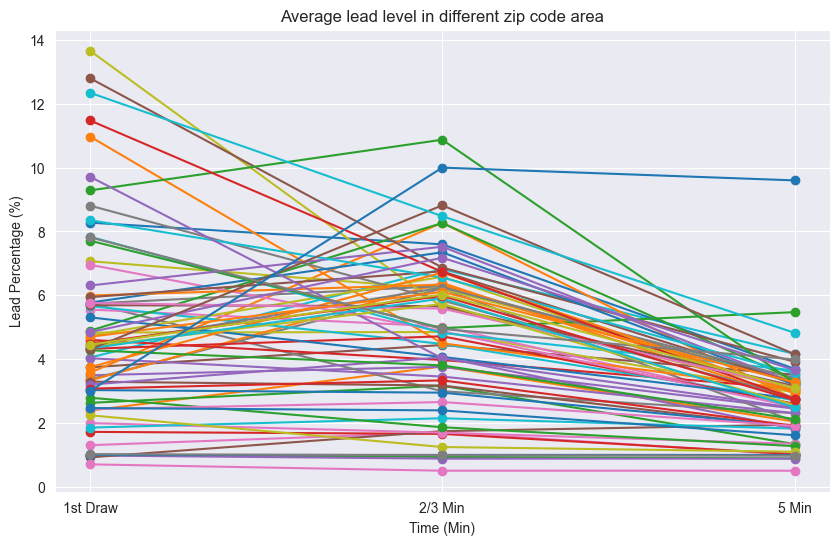

In [95]:
plt.figure(figsize=(10,6))

for i in range(71):
    plt.plot(['1st Draw', '2/3 Min', '5 Min'], zip_lead_df.iloc[i, 1:4], marker='o', label=zip_lead_df.iloc[i, 0])

plt.xlabel('Time (Min)')
plt.ylabel('Lead Percentage (%)')
plt.title('Average lead level in different zip code area')

plt.show()

In [96]:
time_graph_df = merged_df[['Sample Date', '2/3 Min', 'zip']]

Q1 = time_graph_df['2/3 Min'].quantile(0.25)
Q3 = time_graph_df['2/3 Min'].quantile(0.75)
IQR = Q3 - Q1

filter = (time_graph_df['2/3 Min'] >= Q1 - 5 * IQR) & (time_graph_df['2/3 Min'] <= Q3 + 5 *IQR)
time_graph_df = time_graph_df.loc[filter]

time_graph_df['Year'] = time_graph_df['Sample Date'].dt.year
time_graph_df = time_graph_df.groupby(['Year', 'zip'])['2/3 Min'].mean().reset_index()


time_graph_df

,Year,zip,2/3 Min
0,2016,46320,2.700000
1,2016,60068,1.940000
2,2016,60302,3.044000
3,2016,60406,2.900000
4,2016,60453,4.328571
...,...,...,...
544,2023,60712,5.568421
545,2023,60714,7.266667
546,2023,60804,5.244444
547,2023,60805,5.440000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


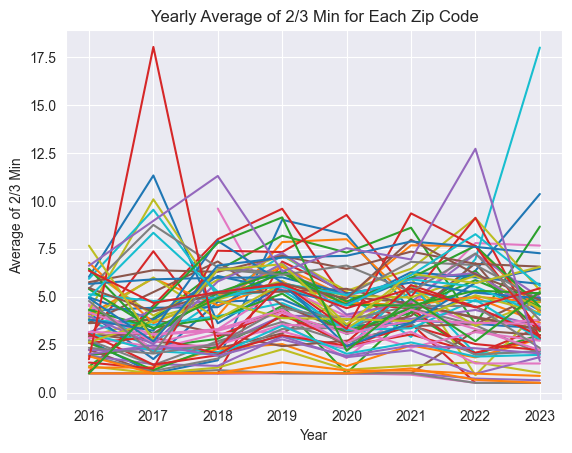

In [97]:
fig, ax = plt.subplots()
for name, group in time_graph_df.groupby('zip'):
    ax.plot(group['Year'], group['2/3 Min'],)
plt.legend().remove()
plt.title('Yearly Average of 2/3 Min for Each Zip Code')
plt.xlabel('Year')
plt.ylabel('Average of 2/3 Min')
plt.show()

C:\Users\harry\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\harry\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\harry\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\harry\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\harry\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly condition

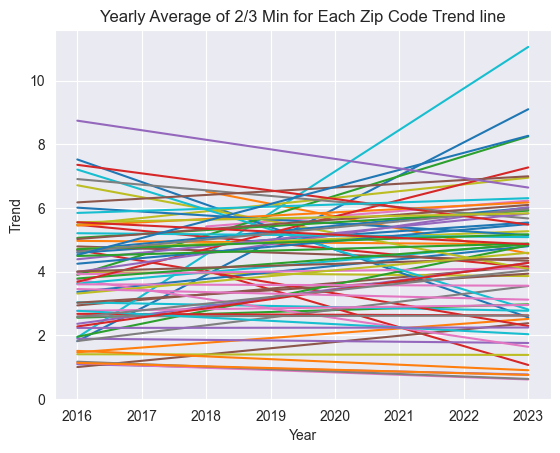

In [98]:
fig, ax = plt.subplots()
for name, group in time_graph_df.groupby('zip'):
    z = np.polyfit(group['Year'], group['2/3 Min'], 1)
    p = np.poly1d(z)
    ax.plot(group['Year'], p(group['Year']),)
plt.legend().remove()
plt.title('Yearly Average of 2/3 Min for Each Zip Code Trend line')
plt.xlabel('Year')
plt.ylabel('Trend')
plt.show()

In [99]:
population_df = zip_lead_df[['zip', '2/3 Min', 'population']]
population_df=population_df.sort_values(by=['population']).reset_index(drop=True)
population_df

,zip,2/3 Min,population
0,60602,1.654255,1142.0
1,60301,1.000000,2890.0
2,60606,1.739806,3298.0
3,60456,4.847414,4324.0
4,61834,10.000000,8247.0
...,...,...,...
66,60647,6.733994,85564.0
67,60632,4.818767,87395.0
68,60639,6.749444,89037.0
69,60618,5.019396,95078.0


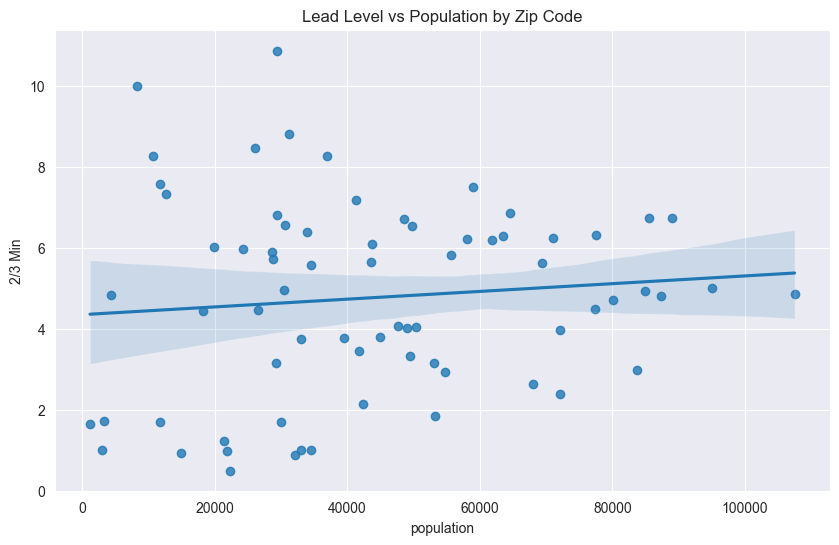

In [100]:
plt.figure(figsize=(10, 6))
sns.regplot(data=population_df, x='population', y='2/3 Min')
plt.title('Lead Level vs Population by Zip Code')
plt.show()

In [101]:
density_df = zip_lead_df[['zip', '2/3 Min', 'density']]
density_df = density_df.sort_values(by=['density']).reset_index(drop=True)
density_df

,zip,2/3 Min,density
0,61834,10.000000,29.8
1,60633,7.346195,502.0
2,60007,1.000000,704.7
3,60501,7.594565,1043.5
4,60803,0.500000,1111.7
...,...,...,...
66,60660,3.801048,13631.6
67,60601,0.931818,14706.9
68,60610,2.144706,14725.7
69,60654,0.985217,15577.5


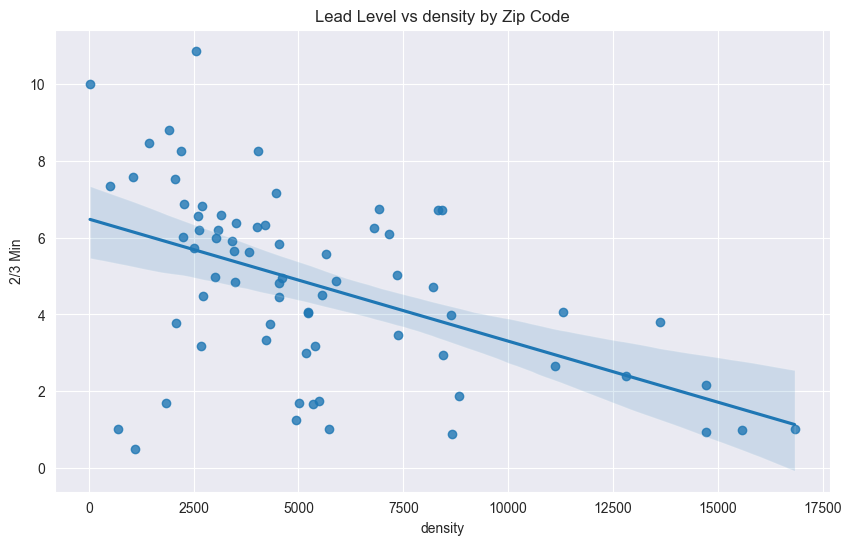

In [102]:
plt.figure(figsize=(10, 6))
sns.regplot(data=density_df, x='density', y='2/3 Min')
plt.title('Lead Level vs density by Zip Code')
plt.show()

In [138]:
detail_zip_df = merged_df.groupby('zip')[['1st Draw', '2/3 Min', '5 Min']].mean().reset_index()
zip_code_df = zip_code_df.rename(columns={'Name': 'zip'})

detail_zip_df = detail_zip_df.merge(zip_code_df[['zip','median_INC_2017-2021','per_capita_INC_2017-2021','major_crime_2018-2022','violent_crime_2018-2022','public_crime_2012-2016', 'behavioral_ health_hospitalizations_2017', 'cognitive_difficulty_percent_2017-2021', 'poverty_rate_percent_2017-2021','high_school_grad_rate_2017-2021', 'college_grad_rate_2017-2021', 'non_hispanic_white_percent_2017-2021']], on='zip', how='left')
detail_zip_df = detail_zip_df.dropna().reset_index(drop=1)
detail_zip_df = detail_zip_df.drop([14,44]).reset_index(drop=1)
detail_zip_df.to_csv('detail_zip.csv')
detail_zip_df

,zip,1st Draw,2/3 Min,5 Min,median_INC_2017-2021,per_capita_INC_2017-2021,major_crime_2018-2022,violent_crime_2018-2022,public_crime_2012-2016,behavioral_ health_hospitalizations_2017,cognitive_difficulty_percent_2017-2021,poverty_rate_percent_2017-2021,high_school_grad_rate_2017-2021,college_grad_rate_2017-2021,non_hispanic_white_percent_2017-2021
0,60601,1.004545,0.931818,0.884848,123115.0,137556.0,1736.752366,148.889510,57.189159,91.0,1.995805,5.834093,97.917725,88.031149,54.877060
1,60602,1.717660,1.654255,1.021064,235666.0,168423.0,282.033895,25.289746,5.774626,25.0,0.000000,2.222222,100.000000,82.217782,47.022767
2,60605,0.977037,0.878519,0.878519,112162.0,85947.0,1675.218975,246.799483,126.443697,285.0,2.914663,8.612424,95.316371,78.088010,57.037753
3,60606,0.918447,1.739806,1.941748,130196.0,133605.0,529.774357,58.453847,20.751522,66.0,0.363857,8.550637,99.266177,91.794530,59.642207
4,60607,1.993191,1.692766,1.342979,109634.0,65052.0,2208.933790,266.924943,266.380039,651.0,4.155217,16.888971,96.620012,78.920985,51.797266
5,60608,5.754200,2.991867,2.301333,61490.0,26958.0,2208.318895,582.919388,978.662767,1137.0,3.625513,16.787975,74.265756,30.445646,20.245194
6,60609,7.067451,6.198088,3.329297,43048.0,23009.0,2179.855381,760.609450,1642.447833,1116.0,4.104459,26.924702,72.765042,17.377649,14.775060
7,60610,1.852540,2.144706,1.820588,99246.0,93795.0,1537.345214,220.706625,182.978152,498.0,3.149999,11.993181,97.158825,78.236189,69.706756
8,60611,1.000000,1.000000,1.000000,117344.0,125624.0,2285.077683,263.585238,86.933274,248.0,1.073433,8.912987,99.282669,87.964404,67.281986
9,60612,3.329272,6.386214,2.735874,52126.0,37182.0,2377.324853,729.616162,1503.783816,1366.0,5.522375,29.057230,88.019560,39.508383,22.717353


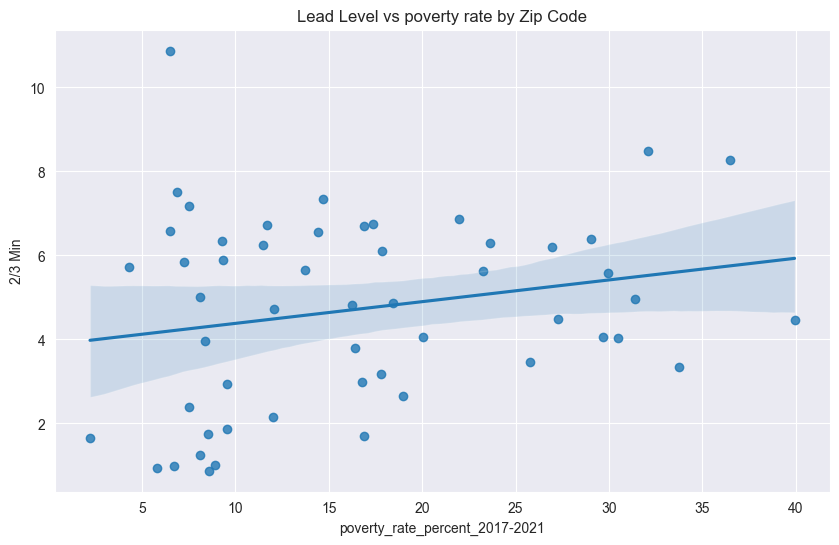

In [139]:
plt.figure(figsize=(10, 6))
sns.regplot(data=detail_zip_df, x='poverty_rate_percent_2017-2021', y='2/3 Min')
plt.title('Lead Level vs poverty rate by Zip Code')
plt.show()

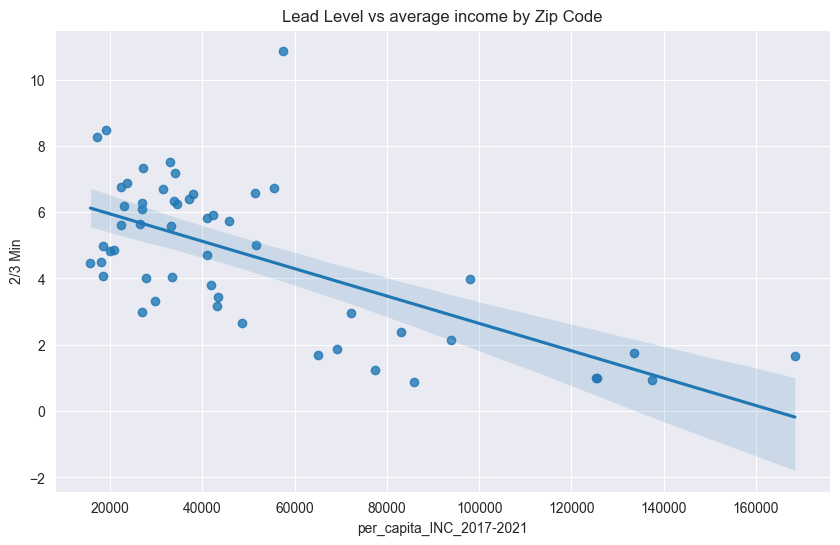

In [140]:
plt.figure(figsize=(10, 6))
sns.regplot(data=detail_zip_df, x='per_capita_INC_2017-2021', y='2/3 Min')
plt.title('Lead Level vs average income by Zip Code')
plt.show()

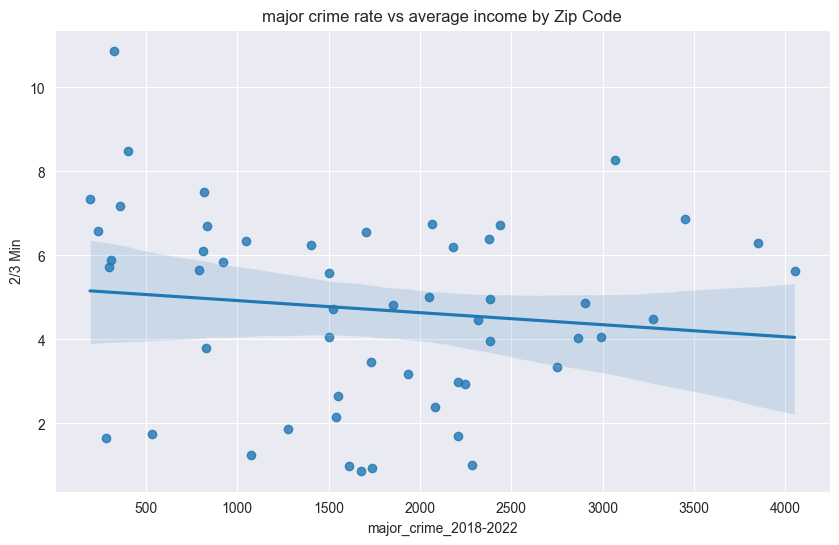

In [141]:
plt.figure(figsize=(10, 6))
sns.regplot(data=detail_zip_df, x='major_crime_2018-2022', y='2/3 Min')
plt.title('major crime rate vs average income by Zip Code')
plt.show()

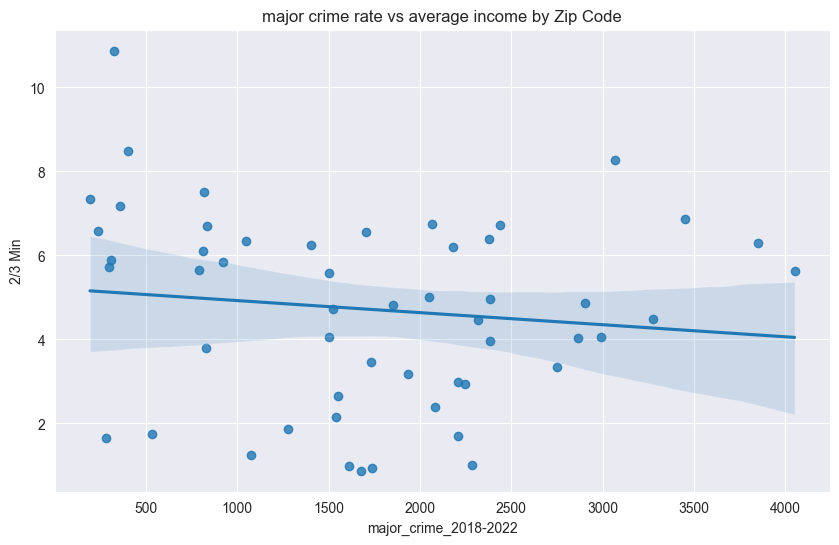

In [142]:
plt.figure(figsize=(10, 6))
sns.regplot(data=detail_zip_df, x='major_crime_2018-2022', y='2/3 Min')
plt.title('major crime rate vs average income by Zip Code')
plt.show()

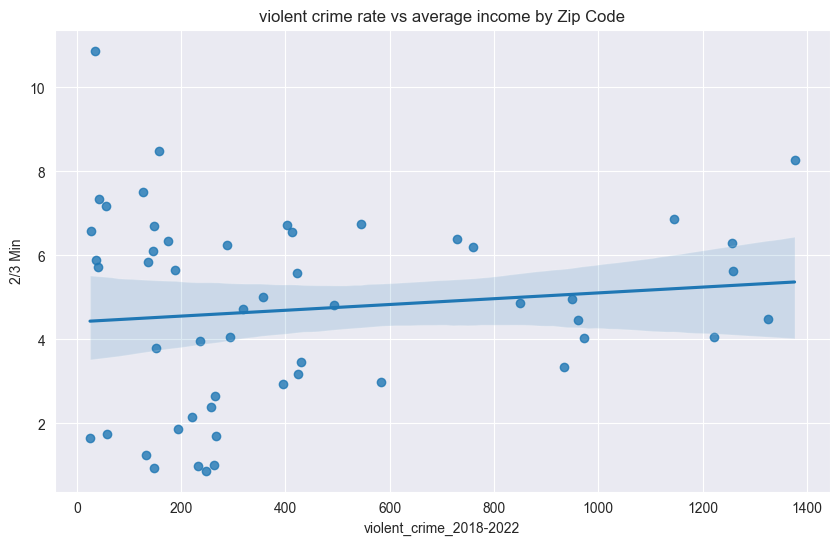

In [143]:
plt.figure(figsize=(10, 6))
sns.regplot(data=detail_zip_df, x='violent_crime_2018-2022', y='2/3 Min')
plt.title('violent crime rate vs average income by Zip Code')
plt.show()

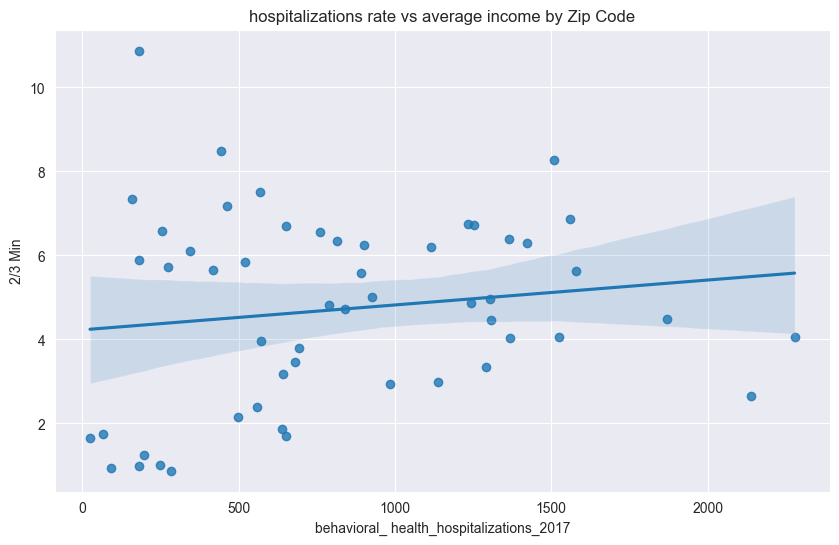

In [144]:
plt.figure(figsize=(10, 6))
sns.regplot(data=detail_zip_df, x='behavioral_ health_hospitalizations_2017', y='2/3 Min')
plt.title('hospitalizations rate vs average income by Zip Code')
plt.show()

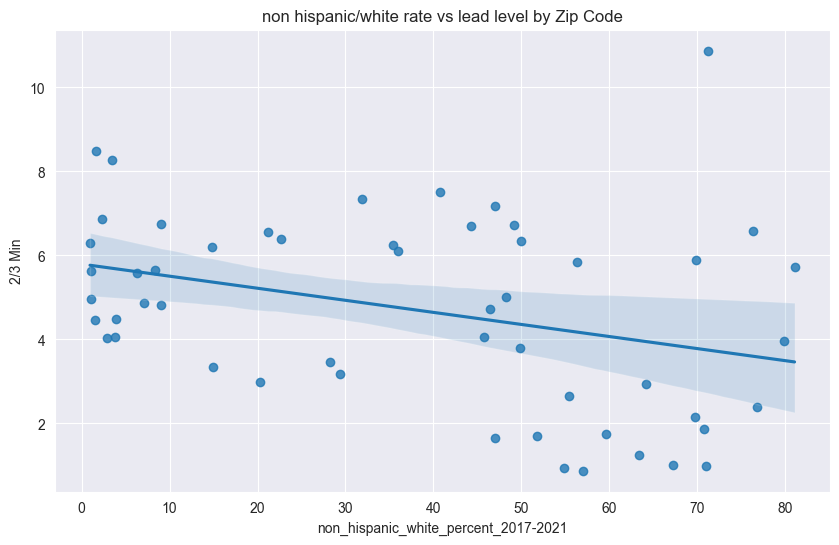

In [145]:

plt.figure(figsize=(10, 6))
sns.regplot(data=detail_zip_df, x='non_hispanic_white_percent_2017-2021', y='2/3 Min')
plt.title('non hispanic/white rate vs lead level by Zip Code')
plt.show()